In [3]:
#euclidean distance
from geopy.distance import distance
import pandas as pd

import pandas as pd
import numpy as np

def calculate_euclidean_distance(filename):

    # read the .plt file as a DataFrame
    df = pd.read_csv(filename, skiprows=6, header=None, names=['latitude', 'longitude', '0', 'altitude', 'date', 'time'])

    # get the previous latitude and longitude values
    df['prev_lat'] = df['latitude'].shift(1)
    df['prev_lon'] = df['longitude'].shift(1)

    # calculate the Euclidean distance between consecutive latitude and longitude values
    df['distance'] = np.sqrt((df['latitude'] - df['prev_lat']) ** 2 + (df['longitude'] - df['prev_lon']) ** 2) * 111000

    # drop the first row (since it doesn't have a previous row to compare to)
    df = df.dropna()

    # return the resulting DataFrame
    return ("distance ",df['distance'].values)

euc_dist=calculate_euclidean_distance('test.plt')
print(euc_dist)

('distance ', array([ 613.83,  498.39, 1955.82, 5914.08,  648.24]))


In [4]:
#haversine distance
import pandas as pd
import numpy as np

def calculate_haversine_distance(filename):
    
    # read the .plt file as a DataFrame
    df = pd.read_csv(filename, skiprows=6, header=None, names=['latitude', 'longitude', '0', 'altitude', 'date', 'time'])

    # convert latitude and longitude values to radians
    df['lat_rad'] = np.radians(df['latitude'])
    df['lon_rad'] = np.radians(df['longitude'])
    df['prev_lat_rad'] = df['lat_rad'].shift(1)
    df['prev_lon_rad'] = df['lon_rad'].shift(1)

    # calculate the Haversine distance between consecutive latitude and longitude values
    dlat = df['lat_rad'] - df['prev_lat_rad']
    dlon = df['lon_rad'] - df['prev_lon_rad']
    a = np.sin(dlat/2)**2 + np.cos(df['lat_rad']) * np.cos(df['prev_lat_rad']) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    df['distance'] = 6371 * c * 1000

    # drop the first row (since it doesn't have a previous row to compare to)
    df = df.dropna()

    # return the resulting DataFrame
    return ("distance is",df['distance'].values)

calculate_haversine_distance('test.plt')


('distance is',
 array([ 614.90794434,  499.26522063, 1959.25460748, 5924.46569162,
         649.3783716 ]))

In [5]:
#manhattan distance
import pandas as pd

def calculate_manhattan_distance(filename):

    # read the .plt file as a DataFrame
    df = pd.read_csv(filename, skiprows=6, header=None, names=['latitude', 'longitude', '0', 'altitude', 'date', 'time'])

    # get the previous latitude and longitude values
    df['prev_lat'] = df['latitude'].shift(1)
    df['prev_lon'] = df['longitude'].shift(1)

    # calculate the Manhattan distance between consecutive latitude and longitude values
    df['distance'] = abs(df['latitude'] - df['prev_lat']) + abs(df['longitude'] - df['prev_lon'])

    # drop the first row (since it doesn't have a previous row to compare to)
    df = df.dropna()
    
    df['distance'] = df['distance'] * 111320

    # return the resulting DataFrame
    return ("distance is",df['distance'].values)

calculate_manhattan_distance('test.plt')

('distance is', array([ 615.5996,  499.8268, 1961.4584, 5931.1296,  650.1088]))

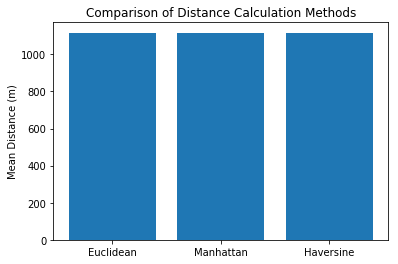

In [26]:
import matplotlib.pyplot as plt

# calculate the distances using all three methods
euclidean_distances = calculate_euclidean_distance('test.plt')[1]
manhattan_distances = calculate_manhattan_distance('test.plt')[1]
haversine_distances = calculate_haversine_distance('test.plt')[1]

# calculate the mean distance for each method
euclidean_mean = np.mean(euclidean_distances)
manhattan_mean = np.mean(manhattan_distances)
haversine_mean = np.mean(haversine_distances)

# create a bar chart
methods = ['Euclidean', 'Manhattan', 'Haversine']
means = [euclidean_mean, manhattan_mean, haversine_mean]
plt.bar(methods, means)
plt.ylabel('Mean Distance (m)')
plt.title('Comparison of Distance Calculation Methods')
plt.show()


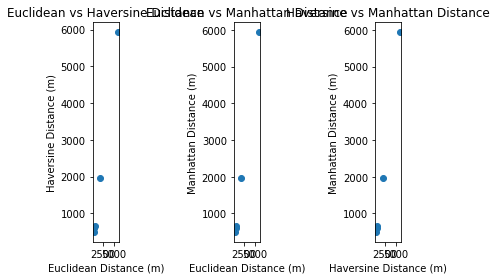

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distance values using each of the three distance metrics
euclidean_dist = calculate_euclidean_distance('test.plt')[1]
haversine_dist = calculate_haversine_distance('test.plt')[1]
manhattan_dist = calculate_manhattan_distance('test.plt')[1]

# Create a DataFrame with the distance values
df = pd.DataFrame({'Euclidean Distance': euclidean_dist,
                   'Haversine Distance': haversine_dist,
                   'Manhattan Distance': manhattan_dist})

# Create scatter plots
plt.subplot(1, 3, 1)
plt.scatter(df['Euclidean Distance'], df['Haversine Distance'])
plt.title('Euclidean vs Haversine Distance')
plt.xlabel('Euclidean Distance (m)')
plt.ylabel('Haversine Distance (m)')

plt.subplot(1, 3, 2)
plt.scatter(df['Euclidean Distance'], df['Manhattan Distance'])
plt.title('Euclidean vs Manhattan Distance')
plt.xlabel('Euclidean Distance (m)')
plt.ylabel('Manhattan Distance (m)')

plt.subplot(1, 3, 3)
plt.scatter(df['Haversine Distance'], df['Manhattan Distance'])
plt.title('Haversine vs Manhattan Distance')
plt.xlabel('Haversine Distance (m)')
plt.ylabel('Manhattan Distance (m)')

plt.tight_layout()
plt.show()
